# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 4.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
321858,0.9229,0.0806,0.0757,0.0049,0.0024,0.0317,0.0391,0.2246,0.1147,0.0610,5,5,9,9
273157,0.0098,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024,0.0317,0.0024,0.0171,0,0,0,0
487,0.1636,0.0024,0.0317,0.0024,0.0024,0.0195,0.5566,0.2393,0.0049,0.0024,1,1,1,1
284163,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0,0,0,0
236237,0.0732,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.0024,0.0146,0,0,0,0


In [3]:
raw_data.shape

(455868, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455868 entries, 0 to 455867
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          455868 non-null  float64
 1   Emg2          455868 non-null  float64
 2   Emg3          455868 non-null  float64
 3   Emg4          455868 non-null  float64
 4   Emg5          455868 non-null  float64
 5   Emg6          455868 non-null  float64
 6   Emg7          455868 non-null  float64
 7   Emg8          455868 non-null  float64
 8   Emg9          455868 non-null  float64
 9   Emg10         455868 non-null  float64
 10  repetition    455868 non-null  int64  
 11  rerepetition  455868 non-null  int64  
 12  stimulus      455868 non-null  int64  
 13  restimulus    455868 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000
mean,0.332545,0.058456,0.049844,0.023382,0.009703,0.035887,0.191725,0.173032,0.070132,0.065993,3.237610,2.511964,5.738133,4.701942
std,0.467568,0.142487,0.139377,0.102822,0.028035,0.069141,0.267717,0.180930,0.153322,0.110593,3.490469,3.337748,6.599320,6.493878
min,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022000,0.002400,0.002400,0.002400,0.002400,0.002400,0.014600,0.048800,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.105000,0.002400,0.002400,0.002400,0.002400,0.009800,0.117200,0.112300,0.004900,0.026900,2.000000,0.000000,3.000000,0.000000
75%,0.476100,0.056200,0.024400,0.002400,0.002400,0.039100,0.263700,0.239300,0.083000,0.078100,6.000000,5.000000,10.000000,9.000000
max,4.458000,4.514200,3.064000,3.234900,0.803200,1.042500,4.663100,2.041000,3.513200,1.562500,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     187582
8      15555
12     15514
7      15504
4      15498
2      15497
5      15479
9      15471
6      15468
11     15465
10     15440
1      15430
3      15426
17     10355
14     10338
13     10335
15     10310
16     10267
19      5186
18      5170
21      5164
20      5142
23      5138
22      5134
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

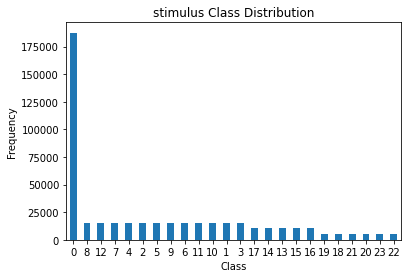

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
266116,1.1719,0.1050,0.1538,0.0757,0.0171,0.0781,0.2905,0.4224,0.1099,0.0684,4,4,3,3
69274,1.8286,0.2197,0.0488,0.0024,0.0122,0.0806,0.4199,0.8716,0.2734,0.2563,3,3,9,9
316703,0.3320,0.0708,0.0024,0.0024,0.0024,0.0293,0.1782,0.2100,0.0757,0.0220,9,9,8,8
402835,0.3955,0.0024,0.0024,0.0024,0.0024,0.0537,0.0952,0.1587,0.0024,0.0024,5,5,18,18
213551,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0,0,0,0


In [12]:
raw_data.shape

(385177, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385177 entries, 0 to 455867
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          385177 non-null  float64
 1   Emg2          385177 non-null  float64
 2   Emg3          385177 non-null  float64
 3   Emg4          385177 non-null  float64
 4   Emg5          385177 non-null  float64
 5   Emg6          385177 non-null  float64
 6   Emg7          385177 non-null  float64
 7   Emg8          385177 non-null  float64
 8   Emg9          385177 non-null  float64
 9   Emg10         385177 non-null  float64
 10  repetition    385177 non-null  int64  
 11  rerepetition  385177 non-null  int64  
 12  stimulus      385177 non-null  int64  
 13  restimulus    385177 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.1 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# XGBoost

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[08:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [18]:
y_pred = xgb.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 80.98161898333247


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     36204
           1       0.75      0.69      0.72      2317
           2       0.71      0.67      0.69      1955
           3       0.80      0.70      0.75      1962
           4       0.80      0.67      0.73      2350
           5       0.76      0.64      0.69      2458
           6       0.79      0.66      0.72      2370
           7       0.64      0.64      0.64      2108
           8       0.78      0.67      0.73      2281
           9       0.71      0.63      0.67      2569
          10       0.78      0.59      0.68      2439
          11       0.81      0.68      0.74      2220
          12       0.77      0.50      0.61      2556
          13       0.87      0.74      0.80      1440
          14       0.61      0.63      0.62      1408
          15       0.74      0.70      0.72      1651
          16       0.73      0.71      0.72      1855
 

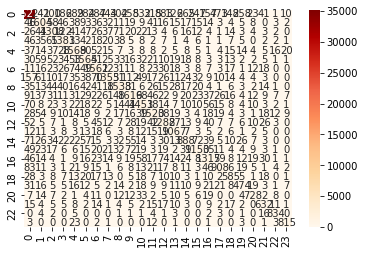

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

https://analyticsindiamag.com/7-types-classification-algorithms/

https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier

https://www.kaggle.com/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85

# Evaluation

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.4853834570849993
MSE: 16.874136767225714
RMSE: 4.107814110597717


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.8047061234975484
Recall Score :  0.8098161898333247
f1_score :  0.8025186947324835
